### Student Details

Student Name: Akshata Bheemasamudra Mallikarjunappa

Student ID: 23164204

# Task 2: Probability Theory

## Discrete random variable
### Binomial distribution

The probability of finding a fragile labeled luggage at airport out of 100 customers' bag. Probability of a fragile labeled luggage is 20% and run this test 50 times.

## Approach

n trials = 10000
success rate of fragile = 0.2

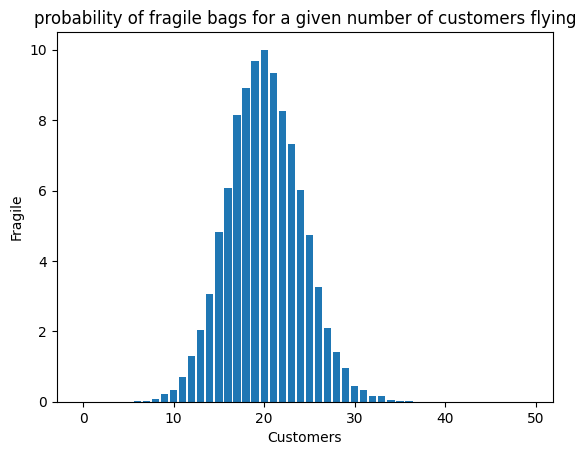

In [2]:
# Your code

import random
import numpy as np
import pandas
import matplotlib.pyplot as plt

#
arr = [0] * 50
for _ in range(5000):
  count = 0
  for i in range(100):
    if random.random() <= 0.2:
      count = count + 1
  data[count] += 1

data_arr = np.array(data)/100

# Plotting the probability on graph
plt.bar(range(50),data_arr)
plt.ylabel('Fragile')
plt.xlabel('Customers')
plt.title('probability of fragile bags for a given number of customers flying')
plt.show()

### Solving the example 2 question from activity

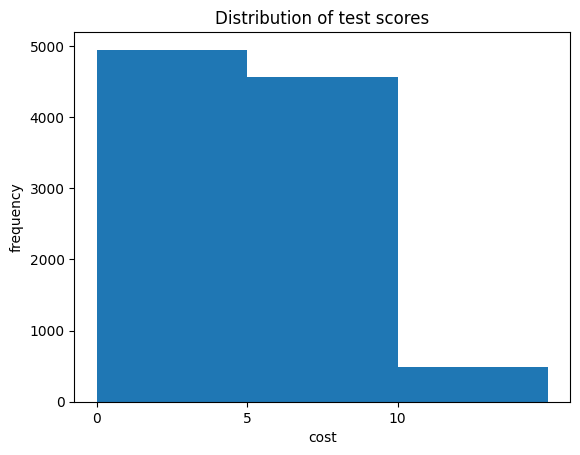

In [7]:
import numpy as np
import matplotlib.pyplot as plt

mean = 50
std = 15
simulation = 10000

def test():
# generating random test score and calculating cost based on test score
  test_score = np.random.normal(mean, std)
  if test_score < 50:
    return 0
  elif 50 <= test_score < 75:
    return 5
  else:
    return 10

# for performing simulation
costs = []
for _ in range(simulation):
 costs.append(test())

# for plotting the graph

plt.hist(costs, bins = [0,5,10,15])
plt.title('Distribution of test scores')
plt.xlabel('cost')
plt.ylabel('frequency')
plt.xticks([0,5,10])
plt.show()

# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [12]:
# import dependencies
import numpy as np
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

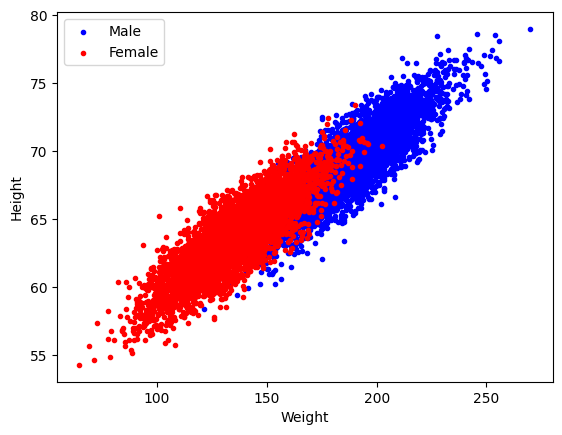

In [13]:
import matplotlib.pyplot as plt
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

plt.scatter(male_data['Weight'], male_data['Height'], label='Male', color='blue', marker='.')
plt.scatter(female_data['Weight'], female_data['Height'], label='Female', color='red', marker='.')

plt.ylabel('Height')
plt.xlabel('Weight')
plt.legend()
plt.show()

###### Discuss: Do you think there is resonable separation?

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [14]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

### Test the algorithm
Using the test data

In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8839393939393939


### Plot the random samples

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


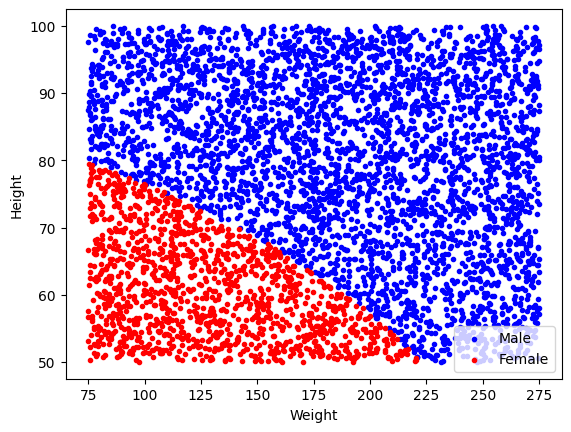

In [18]:
heights = np.random.uniform(50, 100, 5000)
weights = np.random.uniform(75, 275, 5000)

sample = np.stack((heights,  weights), axis=-1)

y_pred = gnb.predict(sample)

new_data = np.stack((y_pred, heights, weights), axis=-1)

new_data_df = pandas.DataFrame(new_data, columns = ['Gender','Height','Weight'])

# color code the data
new_male_data = new_data_df[new_data_df['Gender'] == 'Male']
new_female_data = new_data_df[new_data_df['Gender'] == 'Female']

#plot the data
plt.scatter(new_male_data['Weight'].astype(float), new_male_data['Height'].astype(float), label='Male', color='blue', marker='.')
plt.scatter(new_female_data['Weight'].astype(float), new_female_data['Height'].astype(float), label='Female', color='red', marker='.')

plt.ylabel('Height')
plt.xlabel('Weight')
plt.legend()
plt.show()

Reinforcement Learning

This is one of the types of machine learning advanced techniques, wherein the model learns based on good and bad outcomes. The application I explored is real-time traffic signal control [Paper 1](https://www.sciencedirect.com/science/article/pii/S2352146522001624//) for cities which have a greater congestion.

As we have shifted towards autonomous driving, effective way to choose routes, we might need to shift our focus from manual traffic signal to something automated and this is where RL plays its part. Its capacity to solve intricate problems, especially based on real-time helps it to train itself in an online platform which fastens the process of achieving output. This aims to find the most suitable policy based on Marklov Decision Process, for controlling the traffic light such that the traffic is flowing all the time or is stopped for less duration to avoid forming long queues, which inversely will reduce fuel consumption & wait time. The researchers have used the policy gradient algorithm to find the best local value towards a better rwarding function. It begins with an initial situation and some output results for making decisions at for that instance, it keeps making decisions as and then it takes action and remembers the actions it took as well as the rewards it received. And from this memory of previous actions and rewards, it tries to figure out how to make better decisions in the future.

However, in supervised learning, the wait to map inputs to output and learn based on the past data hinders the whole process and is not suitable for this application as it requires new unseen challenges to be solved without delay or without having to rely on past data since the traffic congestion may vary everytime and this is where RL acts apt as it learns instantly using the reward function and when rewarded for the right simulation, it only gets better.

And in contrast to unsupervised learning, it is based on algorithms and functions on clustered unlabeled data. It is based on finding a pattern before making the next move / decision but we cannot expect a pattern or foresee traffic situation beforehand. Although, it is a self-learning model it does not have the reward function to improvise itself.

